In [10]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [41]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [15]:
#nltk.download('twitter_samples')
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

In [18]:
print(len(pos_tweets))
print(len(neg_tweets))

5000
5000


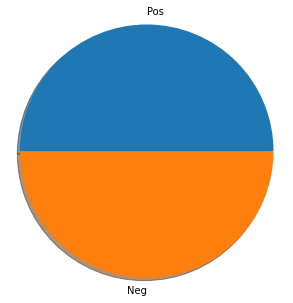

In [19]:
fig = plt.figure(figsize=(5,5))

labels = 'Pos','Neg'

sizes = [len(pos_tweets),len(neg_tweets)]

plt.pie(sizes, labels=labels,shadow=True)

plt.axis('equal')

plt.show()

In [ ]:
# Preprocess
# Tokenize, lowercase, removing stopwords, stemming

In [20]:
tweet = pos_tweets [300]
print(tweet)

Stats for the day have arrived. 2 new followers and NO unfollowers :) via http://t.co/xxlXs6xYwe.


In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amithasanshuvo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [30]:
# remove hyperlinks, marks, styles
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

Stats for the day have arrived. 2 new followers and NO unfollowers :) via http://t.co/xxlXs6xYwe.

Stats for the day have arrived. 2 new followers and NO unfollowers :) via 


In [31]:
# Tokenize the string

print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenize String')
print(tweet_tokens)

Stats for the day have arrived. 2 new followers and NO unfollowers :) via 


Tokenize String
['stats', 'for', 'the', 'day', 'have', 'arrived', '.', '2', 'new', 'followers', 'and', 'no', 'unfollowers', ':)', 'via']


In [33]:
# remove stopwords
# import the english stop words list from nltk
stopwords_english = stopwords.words('english')

print ('Stop words')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [35]:
# clean up the text


print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:
    if(word not in stopwords_english and
       word not in string.punctuation):
        tweets_clean.append(word)
        
print('All clean')
print(tweets_clean)



['stats', 'for', 'the', 'day', 'have', 'arrived', '.', '2', 'new', 'followers', 'and', 'no', 'unfollowers', ':)', 'via']

All clean
['stats', 'day', 'arrived', '2', 'new', 'followers', 'unfollowers', ':)', 'via']


In [36]:
# stemming 
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')




['stats', 'for', 'the', 'day', 'have', 'arrived', '.', '2', 'new', 'followers', 'and', 'no', 'unfollowers', ':)', 'via']



In [39]:

stemmer = PorterStemmer()

tweet_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweet_stem.append(stem_word)
    
print('stemmed word')
print(tweet_stem)

stemmed word
['stat', 'day', 'arriv', '2', 'new', 'follow', 'unfollow', ':)', 'via']


In [43]:
tweet = pos_tweets[455]
print()
print('\033[92m')
print(tweet)
print('\033[94m')
tweets_stem = process_tweet(tweet); # Preprocess a given tweet
print('preprocessed tweet:')
print(tweets_stem) # Print the result



going to be streaming soon :)

preprocessed tweet:
['go', 'stream', 'soon', ':)']


In [47]:
# create frequency dictionary
freqs = build_freqs(tweet, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 1


In [48]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 0, 0],
 ['merri', 0, 0],
 ['nice', 0, 0],
 ['good', 0, 0],
 ['bad', 0, 0],
 ['sad', 0, 0],
 ['mad', 0, 0],
 ['best', 0, 0],
 ['pretti', 0, 0],
 ['❤', 0, 0],
 [':)', 0, 0],
 [':(', 0, 0],
 ['😒', 0, 0],
 ['😬', 0, 0],
 ['😄', 0, 0],
 ['😍', 0, 0],
 ['♛', 0, 0],
 ['song', 0, 0],
 ['idea', 0, 0],
 ['power', 0, 0],
 ['play', 0, 0],
 ['magnific', 0, 0]]

In [51]:
tweets = pos_tweets + neg_tweets
labels = np.append(np.ones((len(pos_tweets),1)),np.zeros((len(neg_tweets),1)), axis = 0)

In [52]:
train_pos = pos_tweets[:4000]
train_neg = neg_tweets[:4000]

train_x = train_pos + train_neg

print(len(train_x))

8000


In [54]:
import pandas as pd
data = pd.read_csv('logistic_features.csv')
data.head()

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [55]:
X = data[['bias','positive','negative']].values
Y = data['sentiment'].values

print(X.shape)

(8000, 3)


In [56]:
theta = [7e-08, 0.0005239, -0.00055517]

In [57]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]